In [1]:
import sympy
sympy.init_printing()

Closed loop transfer functions for multivariable systems
========================================================

Let's consider a 2 $\times$ 2 system with feedback control as shown below:

<img src="mimo2x2.png">

In [2]:
G_p11, G_p12, G_p21, G_p22, G_c1, G_c2 = sympy.symbols('G_p11, G_p12, G_p21, G_p22, G_c1, G_c2')

The matrix representation of the system is straigtforwardly handled by `sympy.Matrix`:

In [3]:
G_p = sympy.Matrix([[G_p11, G_p12],
                    [G_p21, G_p22]])

The controller is a bit harder. Convince yourself you understand how the off-diagonal elements of $G_c$ are zero in the diagram above.

In [4]:
G_c = sympy.Matrix([[G_c1, 0],
                    [0, G_c2]])

Now, we can redraw the block diagram using vectors for the signals and matrices for the blocks.
    
<img src="simple_feedback.png" />

Let's derive the closed loop transfer function. There are three equations represented in the above diagram:

$$\begin{align}
E &= Y_{sp} - Y\\ 
U &= G_c E = G_c(Y_{sp} - Y)\\
Y &= G_p U = G_p G_c(Y_{sp} - Y)\\
\end{align}$$

Now, we can solve for $Y$:
$$\begin{align}
Y &= G_p G_c(Y_{sp} - Y)\\
Y &= G_p G_c Y_{sp} - G_p G_c Y \\
Y + G_p G_c Y&= G_p G_c Y_{sp} \\
(I + G_p G_c) Y &= G_p G_c Y_{sp} \\
 Y &= (I + G_p G_c)^{-1} G_p G_c Y_{sp} \\
 Y &= \Gamma Y_{sp}
\end{align}$$

We can calculate the value of this function easily.

In [5]:
I = sympy.Matrix([[1, 0],
                  [0, 1]])

In [6]:
Gamma = sympy.simplify((I + G_p*G_c).inv()*G_p*G_c)

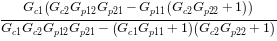

In [7]:
Gamma[0, 0]

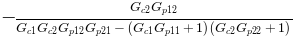

In [8]:
Gamma[0, 1]

We notice that there is a common divisor in all the elements of $\Gamma$. This is due to the calculation of the inverse of $(I + G_p G_c)$, which involves calculation of the determinant $|I + G_p G_c|$.

In [9]:
Delta = (I + G_p*G_c).det()
Delta

In [10]:
(Delta*Gamma).simplify()

⎡G_c1⋅(G_c2⋅Gₚ₁₁⋅Gₚ₂₂ - G_c2⋅Gₚ₁₂⋅Gₚ₂₁ + Gₚ₁₁)                    G_c2⋅Gₚ₁₂   
⎢                                                                             
⎣                  G_c1⋅Gₚ₂₁                    G_c2⋅(G_c1⋅Gₚ₁₁⋅Gₚ₂₂ - G_c1⋅Gₚ

               ⎤
               ⎥
₁₂⋅Gₚ₂₁ + Gₚ₂₂)⎦

Characteristic equation
-----------------------

This leads us to conclude that we can calculate the characteristic equation of the closed loop transfer function as $|I + G_p G_c|$.

Notice that if we wanted the coupling the other way around, we could have worked with the same controller matrix permuted:

In [11]:
G_c*sympy.Matrix([[0, 1], [1, 0]])

⎡ 0    G_c1⎤
⎢          ⎥
⎣G_c2   0  ⎦